In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
!pip freeze --local > /content/gdrive/My\ Drive/colab_installed.txt

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Important PIP instols**

In [4]:
!pip3 install --upgrade Keras
import csv
import tensorflow as tf
import numpy as np
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Requirement already up-to-date: Keras in /usr/local/lib/python3.6/dist-packages (2.4.3)


**Extracting texts from .text files and lableing** 

In [5]:
import sklearn
from sklearn import datasets
from pprint import pprint 

random_state1=100

docs_to_train = sklearn.datasets.load_files("/content/gdrive/My Drive/9_class_Without title_Data_Document_Summary_Label_Davit_Hrach_No_Topic", description=None, categories=None,
                                            load_content=True, shuffle=True, 
                                            encoding='utf-8', decode_error='strict', random_state = random_state1)


# print(docs_to_train)
#print(list(docs_to_train.target_names))

#print(list(docs_to_train.data))

# print(docs_to_train)

# for i in range(1):
#   print(docs_to_train.data[i], docs_to_train.target[i])

# print(docs_to_train.data)
# print(docs_to_train.target)
print(docs_to_train.target_names)

c = dict(docs_to_train)



sentences=c['data']
label=c['target']
labels=np.array(label)
print(labels)
print(len(labels))



['ADVERSE REACTIONS', 'CLINICAL PHARMACOLOGY', 'CONTRAINDICATIONS', 'DESCRIPTION', 'DOSAGE AND ADMINISTRATION', 'HOW SUPPLIEDSTORAGE AND HANDLING', 'INDICATIONS AND USAGE', 'OVERDOSAGE', 'WARNINGS AND PRECAUTIONS']
[1 2 8 0 3 4 3 6 2 3 5 3 6 0 4 4 2 7 8 7 3 6 5 3 2 8 8 1 1 1 5 2 2 2 4 6 2
 2 3 4 6 7 0 0 5 7 6 2 6 5 0 4 1 5 3 3 2 5 5 0 6 0 6 3 5 7 0 2 3 0 7 0 8 0
 4 8 3 7 1 8 6 8 5 7 6 5 4 1 3 0 6 6 0 5 7 8 5 7 6 1 1 7 0 1 6 8 0 1 2 3 4
 4 4 7 0 7 2 7 6 7 7 8 6 8 8 1 0 3 4 5 2 5 2 4 0 1 7 3 3 8 0 0 5 8 1 1 5 5
 6 7 6 3 2 7 0 7 0 3 0 5 3 0 4 7 4 5 1 5 5 6 3 0 5 3 2 2 6 8 4 2 4 0 5 0 0
 7 4 2 4 4 1 1 8 7 2 2 6 1 3 3 1 6 3 4 4 7 0 8 2 6 7 3 2 5 3 8 8 3 8 8 8 4
 4 1 6 2 2 4 2 0 3 8 8 1 8 5 1 5 7 8 0 8 5 7 5 7 3 1 6 1 0 8 7 4 2 0 8 8 4
 1 8 1 3 6 1 4 6 4 6 3 8 2 8 8 8 4 0 3 3 8 7 1 5 0 3 3 4 1 6 1 8 0 1 3 4 5
 2 5 4 4 1 2 0 0 6 1 6 7 5 8 5 6 4 2 6 3 2 2 3 5 5 0 5 6 4 6 7 8 5 5 2 6 6
 1 2 4 2 1 3 8 1 4 0 6 5 0 6 3 3 7 4 4 4 7 1 2 3 7 0 6 7 7 1 8 0 0 2 0 1 5
 4 4 5 3 6 7 3 6 7 4 6 5 3 1 2 7 0 

**Import Pikles**

In [6]:
import pickle
# loading start here

with open('/content/gdrive/My Drive/Tokenisers_randomst_100/tokenizer_first_n_words.pickle', 'rb') as handle:

    tokenizer_n = pickle.load(handle)


with open('/content/gdrive/My Drive/Tokenisers_for_test_randoms100/tokenizer_for_test.pickle', 'rb') as hand:

    tokenizer1 = pickle.load(hand)

**Hyperparameters**

In [7]:

test_portion = 1
remove=75


**Split data into train_validation (train data validation data) and test data**

In [8]:
train_and_cross_val_Test_size = int(len(sentences) * (1-test_portion))

train_cross_val = sentences[:train_and_cross_val_Test_size]
train_labels_cross_val = labels[:train_and_cross_val_Test_size]

control_test_sentences = sentences[train_and_cross_val_Test_size:]
control_test_labels = labels[train_and_cross_val_Test_size:]
print((control_test_labels))


print(len(train_cross_val))
print(len(train_labels_cross_val))
print(len(control_test_sentences))

[1 2 8 0 3 4 3 6 2 3 5 3 6 0 4 4 2 7 8 7 3 6 5 3 2 8 8 1 1 1 5 2 2 2 4 6 2
 2 3 4 6 7 0 0 5 7 6 2 6 5 0 4 1 5 3 3 2 5 5 0 6 0 6 3 5 7 0 2 3 0 7 0 8 0
 4 8 3 7 1 8 6 8 5 7 6 5 4 1 3 0 6 6 0 5 7 8 5 7 6 1 1 7 0 1 6 8 0 1 2 3 4
 4 4 7 0 7 2 7 6 7 7 8 6 8 8 1 0 3 4 5 2 5 2 4 0 1 7 3 3 8 0 0 5 8 1 1 5 5
 6 7 6 3 2 7 0 7 0 3 0 5 3 0 4 7 4 5 1 5 5 6 3 0 5 3 2 2 6 8 4 2 4 0 5 0 0
 7 4 2 4 4 1 1 8 7 2 2 6 1 3 3 1 6 3 4 4 7 0 8 2 6 7 3 2 5 3 8 8 3 8 8 8 4
 4 1 6 2 2 4 2 0 3 8 8 1 8 5 1 5 7 8 0 8 5 7 5 7 3 1 6 1 0 8 7 4 2 0 8 8 4
 1 8 1 3 6 1 4 6 4 6 3 8 2 8 8 8 4 0 3 3 8 7 1 5 0 3 3 4 1 6 1 8 0 1 3 4 5
 2 5 4 4 1 2 0 0 6 1 6 7 5 8 5 6 4 2 6 3 2 2 3 5 5 0 5 6 4 6 7 8 5 5 2 6 6
 1 2 4 2 1 3 8 1 4 0 6 5 0 6 3 3 7 4 4 4 7 1 2 3 7 0 6 7 7 1 8 0 0 2 0 1 5
 4 4 5 3 6 7 3 6 7 4 6 5 3 1 2 7 0 7 5 3 5 6 4 1 2 8 1 0 2 4 5 2 8 8 7 3 8
 1 1 2 8 1 6 7 4 2 8 4 6 0 4 1 1 7 7 8 1 7 7 6 5 0]
0
0
432


**Getting unwanted words from our obtained vocabulary**

In [9]:
first_n_words1=[]

for i in range(remove):
  first_n_words1.append(tokenizer_n.index_word[i+1])

print(first_n_words1)

unwanted_words = first_n_words1
#print(len(stopwords))
print(unwanted_words)
print(len(unwanted_words))

['<OOV>', 'of', 'the', 'and', 'in', 'to', 'with', 'a', 'or', 'be', 'patients', 'is', 'for', '1', '2', 'mg', 'should', 'may', '5', '0', '3', 'not', 'dose', 'as', '4', 'are', '6', 'by', 'drug', 'on', 'been', 'treatment', 'at', 'was', 'adverse', 'use', 'have', 'an', 'day', 'see', 'clinical', 'reactions', 'other', '7', 'were', 'therapy', 'that', 'increased', '8', 'women', 'has', 'placebo', 'risk', '10', 'administration', 'from', 'reported', 'these', 'years', 'pageul', 'estrogen', 'than', 'when', '9', 'tablets', '12', 'no', 'studies', 'during', 'doses', 'symptoms', 'e', 'topiramate', 'effects', 'estrogens']
['<OOV>', 'of', 'the', 'and', 'in', 'to', 'with', 'a', 'or', 'be', 'patients', 'is', 'for', '1', '2', 'mg', 'should', 'may', '5', '0', '3', 'not', 'dose', 'as', '4', 'are', '6', 'by', 'drug', 'on', 'been', 'treatment', 'at', 'was', 'adverse', 'use', 'have', 'an', 'day', 'see', 'clinical', 'reactions', 'other', '7', 'were', 'therapy', 'that', 'increased', '8', 'women', 'has', 'placebo', '

**General stop words**

In [10]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", 
             "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", 
             "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", 
             "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", 
             "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", 
             "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", 
             "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", 
             "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", 
             "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", 
             "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", 
             "yours", "yourself", "yourselves" ]
stopwords=[]
print(len(stopwords))

0


**Combined unwanted words**

In [11]:
unwanted_words = stopwords+first_n_words1
print(len(stopwords))
print(unwanted_words)
print(len(unwanted_words))

0
['<OOV>', 'of', 'the', 'and', 'in', 'to', 'with', 'a', 'or', 'be', 'patients', 'is', 'for', '1', '2', 'mg', 'should', 'may', '5', '0', '3', 'not', 'dose', 'as', '4', 'are', '6', 'by', 'drug', 'on', 'been', 'treatment', 'at', 'was', 'adverse', 'use', 'have', 'an', 'day', 'see', 'clinical', 'reactions', 'other', '7', 'were', 'therapy', 'that', 'increased', '8', 'women', 'has', 'placebo', 'risk', '10', 'administration', 'from', 'reported', 'these', 'years', 'pageul', 'estrogen', 'than', 'when', '9', 'tablets', '12', 'no', 'studies', 'during', 'doses', 'symptoms', 'e', 'topiramate', 'effects', 'estrogens']
75


**Function wich remoove words from list of words**

In [12]:
def remove_words(words):
    """Remove words from list of words"""
    new_words = []
    for word in words:
        if word not in unwanted_words:
            new_words.append(word)
    return new_words

**Function wich filter sentences**

In [13]:
def filtered(sentenc):
  filtered_sentences = []
  for sent in sentenc:
   lis = tf.keras.preprocessing.text.text_to_word_sequence(sent, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ')
   lis = remove_words(lis)
   filtered_sentence = (" ").join(lis)
   filtered_sentences.append(filtered_sentence)
  return filtered_sentences

In [14]:
padding_type='post'
max_length = 100 # max_lenght = 100 դեպքում 88 տոկոս ճծտությամբ աշխատում է Շուշանի դատան,500 ի դեպքում մեր դատան է լավ աշխատում

**Continuing data preprocessing (padding of filtered sentences)**

In [15]:

control_test_sentences_fil=filtered(control_test_sentences )

control_test_sentences_seq = tokenizer1.texts_to_sequences(control_test_sentences_fil)

control_test_sentences_padded= pad_sequences(control_test_sentences_seq , padding=padding_type, maxlen=max_length)
control_test_labels_seq=np.expand_dims(control_test_labels,axis=1)

#print(control_test_sentences_seq[32] )

**Load Models**

In [16]:
# Recreate the exact same model purely from the file

new_model1 = tf.keras.models.load_model('/content/gdrive/My Drive/8_fold_save9494/my_model_fold1.h5')
new_model2 = tf.keras.models.load_model('/content/gdrive/My Drive/8_fold_save9494/my_model_fold2.h5')
new_model3 = tf.keras.models.load_model('/content/gdrive/My Drive/8_fold_save9494/my_model_fold3.h5')
new_model4 = tf.keras.models.load_model('/content/gdrive/My Drive/8_fold_save9494/my_model_fold4.h5')
new_model5 = tf.keras.models.load_model('/content/gdrive/My Drive/8_fold_save9494/my_model_fold5.h5')
new_model6 = tf.keras.models.load_model('/content/gdrive/My Drive/8_fold_save9494/my_model_fold6.h5')
new_model7 = tf.keras.models.load_model('/content/gdrive/My Drive/8_fold_save9494/my_model_fold7.h5')
new_model8 = tf.keras.models.load_model('/content/gdrive/My Drive/8_fold_save9494/my_model_fold8.h5')
  


In [20]:
# print(new_model1.evaluate(control_test_sentences_padded,control_test_labels_seq, batch_size=32))
# print()
# print(new_model2.evaluate(control_test_sentences_padded,control_test_labels_seq, batch_size=32))
# print()
# print(new_model3.evaluate(control_test_sentences_padded,control_test_labels_seq, batch_size=32))
# print()
# print(new_model4.evaluate(control_test_sentences_padded,control_test_labels_seq, batch_size=32))
# print()
# print(new_model5.evaluate(control_test_sentences_padded,control_test_labels_seq, batch_size=32))

14/14 [==============================] - 0s 3ms/step - loss: 1.6635 - accuracy: 0.1157
[1.6634966135025024, 0.11574073880910873]


In [17]:
from scipy.stats import rankdata

y1 = new_model1.predict(control_test_sentences_padded)
y2 = new_model2.predict(control_test_sentences_padded)
y3 = new_model3.predict(control_test_sentences_padded)
y4 = new_model4.predict(control_test_sentences_padded)
y5 = new_model5.predict(control_test_sentences_padded)
y6 = new_model6.predict(control_test_sentences_padded)
y7 = new_model7.predict(control_test_sentences_padded)
y8 = new_model8.predict(control_test_sentences_padded)
y = [y1,y2,y3,y4,y5,y6,y7,y8]


a=[]


y=np.average(y, axis=0)


for i in range(len(y)):
  a.append(np.argmax(y[i]))

**Confusion Matrix for Model1**

In [18]:
#y_pred=Models_and_Histories['model'][4].predict_classes(control_test_sentences_padded)
y_pred=new_model5.predict_classes(control_test_sentences_padded)

con_mat = tf.math.confusion_matrix(labels=control_test_labels_seq, predictions=y_pred).numpy()

print(con_mat)

print()

print((control_test_labels))
#print(y_pred)                                      #aij-should be i, but model predicts j (i,j=0;1...)




Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[[47  0  1  0  0  0  0  1  0]
 [ 1 47  0  0  1  0  0  0  0]
 [ 0  0 45  0  0  0  0  0  1]
 [ 0  0  0 48  0  0  0  0  0]
 [ 1  0  0  0 46  0  2  0  0]
 [ 0  0  0  0  0 47  0  0  0]
 [ 0  0  0  0  0  0 46  2  0]
 [ 0  0  0  0  1  0  0 46  0]
 [ 1  0  0  0  0  0  0  0 48]]

[1 2 8 0 3 4 3 6 2 3 5 3 6 0 4 4 2 7 8 7 3 6 5 3 2 8 8 1 1 1 5 2 2 2 4 6 2
 2 3 4 6 7 0 0 5 7 6 2 6 5 0 4 1 5 3 3 2 5 5 0 6 0 6 3 5 7 0 2 3 0 7 0 8 0
 4 8 3 7 1 8 6 8 5 7 6 5 4 1 3 0 6 6 0 5 7 8 5 7 6 1 1 7 0 1 6 8 0 1 2 3 4
 4 4 7 0 7 2 7 6 7 7 8 6 8 8 1 0 3 4 5 2 5 2 4 0 1 7 3 3 8 0 0 5 8 1 1 5 5
 6 7 6 3 2 7 0 7 0 3 0 5 3 0 4 7 4 5 1 5 5 6 3 0 5 3 2 2 6 8 4 2 4 0 5 0 0
 7 4 2 4 4 1 1 8 7 

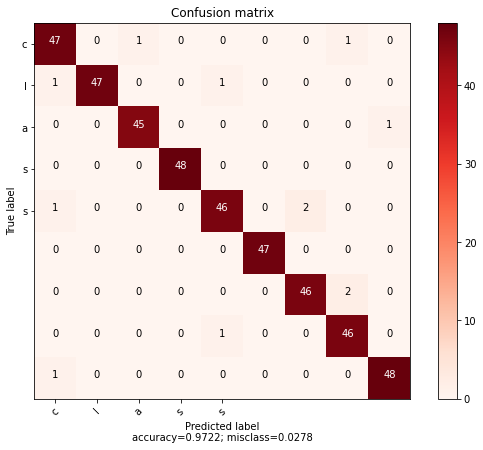

In [19]:

#from sklearn.metrics import confusion_matrix
cm = con_mat 

import numpy as np
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a  confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix(or tf.math.confusion_matrix)

    target_names: given classification classes such as [0, 1, 2, 3, 4, 5, 6]
                  the class names, for example: ['high', 'medium', 'low','MD']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('YlOrBr')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

plot_confusion_matrix(cm,'class',title='Confusion matrix',cmap='Reds', normalize=False)
